* Sorting contours is quite useful when doing image processing
* Sorting by area can assist in Object Recognition (using contour area)
    * Eliminate small contours that may be noise
    * Extract the largest contour
* Sorting by spatial position (using the contour centroid)
    * Sort characters left to right
    * Process images in specific order

[Contour Features](http://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html)

Number of contours found =  4


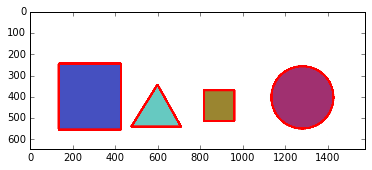

In [1]:
% matplotlib inline
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('img/bunchofshapes.jpg') # load image

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # grayscale our image

edged = cv2.Canny(gray, 50, 200) # find Canny edges

_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # find contours and print how many they are
print ("Number of contours found = ", len(contours))

cv2.drawContours(image, contours, -1, (255,0,0), 10) # draw all contours over blank image

plt.imshow(image)

## Sorting By Area

Contor Areas before sorting [20587.5, 22900.5, 66581.5, 90222.0]
Contor Areas after sorting [90222.0, 66581.5, 22900.5, 20587.5]


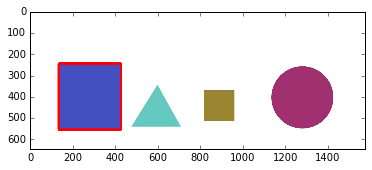

In [2]:
% matplotlib inline
import cv2
import matplotlib.pyplot as plt

def get_contour_areas(contours): # function to display contour area
    return [cv2.contourArea(cnt) for cnt in contours]

image = cv2.imread('img/bunchofshapes.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 200)
_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print ("Contor Areas before sorting", get_contour_areas(contours)) # print the areas of the contours before sorting

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True) # sort contours large to small

print ("Contor Areas after sorting", get_contour_areas(sorted_contours))

cv2.drawContours(image, [sorted_contours[0]], -1, (255,0,0), 10)
plt.imshow(image)

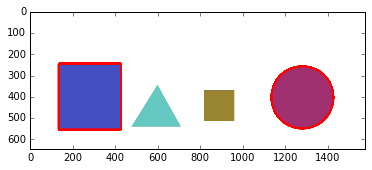

In [3]:
cv2.drawContours(image, [sorted_contours[1]], -1, (255,0,0), 10)
plt.imshow(image)

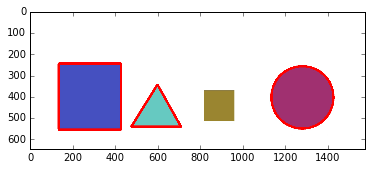

In [4]:
cv2.drawContours(image, [sorted_contours[2]], -1, (255,0,0), 10)
plt.imshow(image)

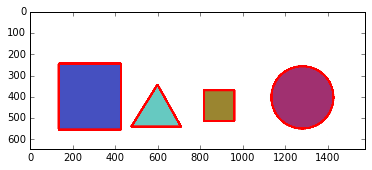

In [5]:
cv2.drawContours(image, [sorted_contours[3]], -1, (255,0,0), 10)
plt.imshow(image)

## Sorting By Position

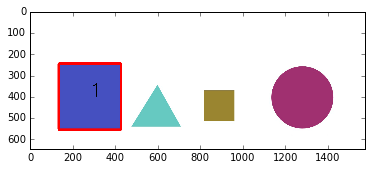

In [1]:
% matplotlib inline
import cv2
import matplotlib.pyplot as plt

def get_centroid_cord(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return (cx, cy)

def get_centroid_xcord(contour):
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return cx

image = cv2.imread('img/bunchofshapes.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 50, 200)
_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours, key=get_centroid_xcord, reverse=False) # left to right

cv2.drawContours(image, [sorted_contours[0]], -1, (255,0,0), 10)
cv2.putText(image, str(0+1), get_centroid_cord(sorted_contours[0]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 3)
plt.imshow(image)

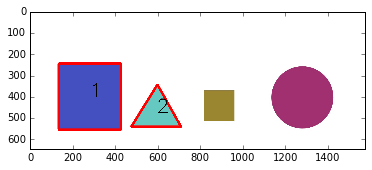

In [2]:
cv2.drawContours(image, [sorted_contours[1]], -1, (255,0,0), 10)
cv2.putText(image, str(1+1), get_centroid_cord(sorted_contours[1]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 3)
plt.imshow(image)

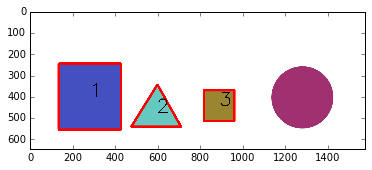

In [3]:
cv2.drawContours(image, [sorted_contours[2]], -1, (255,0,0), 10)
cv2.putText(image, str(2+1), get_centroid_cord(sorted_contours[2]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 3)
plt.imshow(image)

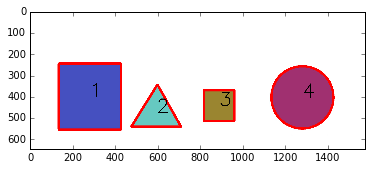

In [4]:
cv2.drawContours(image, [sorted_contours[3]], -1, (255,0,0), 10)
cv2.putText(image, str(3+1), get_centroid_cord(sorted_contours[3]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 3)
plt.imshow(image)